# *Sarcophilus harrisii*

## Genome sequencing and annotation

* Project: Wellcome Trust Sanger Institute

* Release year: 2011

* Sex: female

* Coverage: 85x

* Technology: Illumina HiSeq2000

* [data source](ftp://ftp.ensembl.org/pub/release-86/gtf/)

*Illustration of Sarcophilus*
![Sarcophilus harrisii](https://upload.wikimedia.org/wikipedia/commons/9/95/Sarcophile_oursin_F.Cuvier_1837.jpg)

***

## 1. Data preparation

In [ ]:
! head Sarcophilus_harrisii.gtf -n 20 | less -N -S

      1 #!genome-build Devil_ref v7.0
      2 #!genome-version DEVIL7.0
      3 #!genome-date 2011-03
      4 #!genome-build-accession NCBI:GCA_000189315.1
      5 #!genebuild-last-updated 2011-12
      6 GL849905.1      ensembl gene    826885  827847  .       -       .       
      7 GL849905.1      ensembl transcript      826885  827847  .       -       
      8 GL849905.1      ensembl exon    826885  827847  .       -       .       
      9 GL849905.1      ensembl CDS     826885  827847  .       -       0       
     10 GL849905.1      ensembl gene    1831597 1936735 .       +       .       
     11 GL849905.1      ensembl transcript      1831597 1936735 .       +       
     12 GL849905.1      ensembl exon    1831597 1831902 .       +       .       
     13 GL849905.1      ensembl CDS     1831783 1831902 .       +       0       
     14 GL849905.1      ensembl start_codon     1831783 1831785 .       +       
     15 GL849905.1      ensembl exon    1833107 1833166 .       +       . 

#### Genes and transcripts files

In [1]:
! cat Sarcophilus_harrisii.gtf | grep -E "\s+gene\s+" > Sarcophilus_harrisii_gene.gtf

In [2]:
! cat Sarcophilus_harrisii.gtf | grep -E "\s+transcript\s+" > Sarcophilus_harrisii_transcript.gtf

In [61]:
import pandas as pd
import numpy as np
import re
import matplotlib as plt
import pylab as pl
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab

In [62]:
genes=pd.read_table('/home/ja/Sarcophilus_harrisii_projekt/Sarcophilus_harrisii_gene.gtf', header=None, dtype={0:np.object})   
genes.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [63]:
transcripts=pd.read_table('/home/ja/Sarcophilus_harrisii_projekt/Sarcophilus_harrisii_transcript.gtf', header=None, dtype={0:np.object})
transcripts.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [64]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,attribute
0,GL849905.1,ensembl,gene,826885,827847,.,-,.,"gene_id ""ENSSHAG00000011277""; gene_version ""1""..."
1,GL849905.1,ensembl,gene,1831597,1936735,.,+,.,"gene_id ""ENSSHAG00000015543""; gene_version ""1""..."
2,GL849905.1,ensembl,gene,1961308,1979044,.,-,.,"gene_id ""ENSSHAG00000015925""; gene_version ""1""..."
3,GL849905.1,ensembl,gene,2031211,2070986,.,-,.,"gene_id ""ENSSHAG00000016104""; gene_version ""1""..."
4,GL849905.1,ensembl,gene,2087139,2108480,.,-,.,"gene_id ""ENSSHAG00000016243""; gene_version ""1""..."


#### Parsing of attributes column

In [65]:
def parse_attributes(attributes_str):
    
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out

In [66]:
def split_attribute_column(df):
   
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

genes = split_attribute_column(genes)
transcripts = split_attribute_column(transcripts)

In [67]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
0,GL849905.1,ensembl,gene,826885,827847,.,-,.,protein_coding,ENSSHAG00000011277,NaN
1,GL849905.1,ensembl,gene,1831597,1936735,.,+,.,protein_coding,ENSSHAG00000015543,ATP11B
2,GL849905.1,ensembl,gene,1961308,1979044,.,-,.,protein_coding,ENSSHAG00000015925,DCUN1D1
3,GL849905.1,ensembl,gene,2031211,2070986,.,-,.,protein_coding,ENSSHAG00000016104,MCCC1
4,GL849905.1,ensembl,gene,2087139,2108480,.,-,.,protein_coding,ENSSHAG00000016243,NaN


#### Check for number of chromozomes

it seems that seqname column does not refer to chromozomes

In [68]:
genes["seqname"].unique()

array(['GL849905.1', 'GL856749.1', 'GL834541.1', ..., 'GL841022.1',
       'GL864038.1', 'GL854586.1'], dtype=object)

In [69]:
genes["seqname"].value_counts().value_counts()

1     1723
2      520
3      266
4      192
5      127
6      124
7      109
8       72
9       65
10      53
12      43
14      41
11      41
18      38
13      38
16      36
17      34
15      34
19      21
22      20
21      18
20      18
23      17
25      14
24      13
31      11
27       9
26       9
32       8
34       8
      ... 
41       4
37       4
35       4
43       3
42       3
28       3
30       3
53       2
45       2
62       2
54       2
50       2
48       2
46       2
55       2
93       1
36       1
64       1
66       1
78       1
84       1
86       1
83       1
47       1
49       1
51       1
57       1
67       1
77       1
88       1
Name: seqname, dtype: int64

#### Check for if there are only genes


In [70]:
genes["feature"].unique()

array(['gene'], dtype=object)

In [71]:
transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,GL849905.1,ensembl,transcript,826885,827847,.,-,.,protein_coding,ENSSHAG00000011277,NaN,protein_coding,ENSSHAT00000013299,NaN
1,GL849905.1,ensembl,transcript,1831597,1936735,.,+,.,protein_coding,ENSSHAG00000015543,ATP11B,protein_coding,ENSSHAT00000018461,ATP11B-201
2,GL849905.1,ensembl,transcript,1845704,1924465,.,+,.,protein_coding,ENSSHAG00000015543,ATP11B,protein_coding,ENSSHAT00000018462,ATP11B-202
3,GL849905.1,ensembl,transcript,1961308,1979044,.,-,.,protein_coding,ENSSHAG00000015925,DCUN1D1,protein_coding,ENSSHAT00000018917,DCUN1D1-201
4,GL849905.1,ensembl,transcript,2031211,2070986,.,-,.,protein_coding,ENSSHAG00000016104,MCCC1,protein_coding,ENSSHAT00000019128,MCCC1-201


#### Check for if there are only transcripts


In [72]:
transcripts["feature"].unique()

array(['transcript'], dtype=object)

***

## 2. Data analysis

[Source of statistics](http://www.ensembl.org/Sarcophilus_harrisii/Info/Index)

[Wiki](https://en.wikipedia.org/wiki/Tasmanian_devil#Genetics)

* 2,931,556,433 bp 
* 14 chromosomes
* low genetic diversity (founder effect, island effect, population bottleneck)
* devil facial tumour disease (DFTD)

#### Number of genes/transcripts


In [73]:
genes_number = len(genes["gene_id"].unique())
genes_number

20456

In [74]:
transcripts_number = len(transcripts["transcript_id"].unique())
transcripts_number

24072

#### Gene biotypes


In [75]:
genes["gene_biotype"].value_counts()

protein_coding    18788
snRNA               503
miRNA               486
snoRNA              277
pseudogene          178
misc_RNA            113
rRNA                 87
Mt_tRNA              22
Mt_rRNA               2
Name: gene_biotype, dtype: int64

#### Number of transcripts assigned more than once to gene


In [76]:
transcripts_number-genes_number

3616

#### Genes without name


In [77]:
named_genes = genes["gene_name"].notnull().values.sum()
named_genes

13242

#### Trial to extract lengths via `NumPy`

not the good way


In [78]:
start_genes = np.array((genes["start"]))
end_genes = np.array((genes["end"]))
length_genes = end_genes - start_genes
np.array(length_genes).tolist()

[962,
 105138,
 17736,
 39775,
 21341,
 254954,
 943,
 3751,
 4239,
 134,
 133,
 181,
 130,
 320,
 14978,
 27495,
 350038,
 1031,
 1019,
 21835,
 1025,
 962,
 14143,
 47751,
 29884,
 45353,
 4335,
 34480,
 11983,
 1999,
 7866,
 76105,
 17667,
 14057,
 166559,
 14408,
 12185,
 18632,
 13699,
 19979,
 37278,
 55889,
 42385,
 55207,
 92,
 54772,
 53620,
 1677,
 52565,
 8641,
 15797,
 30903,
 83615,
 545,
 28806,
 29620,
 19315,
 19380,
 19539,
 84818,
 26849,
 23917,
 39124,
 212223,
 12745,
 7627,
 85896,
 141290,
 16542,
 129373,
 104,
 45635,
 18327,
 15404,
 34068,
 5048,
 10503,
 17999,
 18241,
 27348,
 26094,
 26836,
 37419,
 10732,
 13642,
 214654,
 1677,
 39996,
 71422,
 77878,
 44867,
 63637,
 26414,
 850,
 175149,
 902,
 118530,
 122,
 137240,
 103,
 188159,
 11230,
 27976,
 33965,
 16427,
 2039,
 2363,
 2180,
 160655,
 166588,
 108925,
 15111,
 31433,
 1526,
 1115,
 3730,
 47849,
 20796,
 212,
 10778,
 13314,
 37336,
 4141,
 27944,
 75869,
 50133,
 386,
 20032,
 2745,
 13905,
 

In [79]:
genes_len_added = np.column_stack((length_genes, genes))
genes_len_added

array([[962, 'GL849905.1', 'ensembl', ..., 'protein_coding',
        'ENSSHAG00000011277', nan],
       [105138, 'GL849905.1', 'ensembl', ..., 'protein_coding',
        'ENSSHAG00000015543', 'ATP11B'],
       [17736, 'GL849905.1', 'ensembl', ..., 'protein_coding',
        'ENSSHAG00000015925', 'DCUN1D1'],
       ..., 
       [1265, 'GL841022.1', 'ensembl', ..., 'protein_coding',
        'ENSSHAG00000000267', nan],
       [1088, 'GL864038.1', 'ensembl', ..., 'protein_coding',
        'ENSSHAG00000000227', 'CCR1'],
       [946, 'GL854586.1', 'ensembl', ..., 'protein_coding',
        'ENSSHAG00000000169', nan]], dtype=object)

#### Extracting lengths by `for`

new column to *genes* and *transcripts* tables 


In [80]:
for x in genes:
    length_g = (genes["end"] - genes["start"])
genes = genes.assign(length=length_g.values)
genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,length
0,GL849905.1,ensembl,gene,826885,827847,.,-,.,protein_coding,ENSSHAG00000011277,NaN,962
1,GL849905.1,ensembl,gene,1831597,1936735,.,+,.,protein_coding,ENSSHAG00000015543,ATP11B,105138
2,GL849905.1,ensembl,gene,1961308,1979044,.,-,.,protein_coding,ENSSHAG00000015925,DCUN1D1,17736
3,GL849905.1,ensembl,gene,2031211,2070986,.,-,.,protein_coding,ENSSHAG00000016104,MCCC1,39775
4,GL849905.1,ensembl,gene,2087139,2108480,.,-,.,protein_coding,ENSSHAG00000016243,NaN,21341


In [81]:
for x in transcripts:
    length_t = (transcripts["end"] - transcripts["start"])
transcripts = transcripts.assign(length=length_t.values)
transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name,length
0,GL849905.1,ensembl,transcript,826885,827847,.,-,.,protein_coding,ENSSHAG00000011277,NaN,protein_coding,ENSSHAT00000013299,NaN,962
1,GL849905.1,ensembl,transcript,1831597,1936735,.,+,.,protein_coding,ENSSHAG00000015543,ATP11B,protein_coding,ENSSHAT00000018461,ATP11B-201,105138
2,GL849905.1,ensembl,transcript,1845704,1924465,.,+,.,protein_coding,ENSSHAG00000015543,ATP11B,protein_coding,ENSSHAT00000018462,ATP11B-202,78761
3,GL849905.1,ensembl,transcript,1961308,1979044,.,-,.,protein_coding,ENSSHAG00000015925,DCUN1D1,protein_coding,ENSSHAT00000018917,DCUN1D1-201,17736
4,GL849905.1,ensembl,transcript,2031211,2070986,.,-,.,protein_coding,ENSSHAG00000016104,MCCC1,protein_coding,ENSSHAT00000019128,MCCC1-201,39775


#### Mean length for genes grouped by biotype


In [82]:
(genes.groupby(["gene_biotype"]).length.sum())/(genes["gene_biotype"].value_counts())

Mt_rRNA            1259.000000
Mt_tRNA              67.409091
miRNA                90.701646
misc_RNA            260.318584
protein_coding    36979.190600
pseudogene        73188.702247
rRNA                115.057471
snRNA               110.731610
snoRNA              117.855596
dtype: float64

#### Mean length for protein coding transcripts

is different from mean of protein coding genes (up)

other biotypes same


In [83]:
transcripts_subset = transcripts[(transcripts.transcript_biotype == "protein_coding")]
(sum(transcripts_subset.length))/len(transcripts_subset)

38504.607302267454

#### No of genes on *plus* and *minus* strand


In [84]:
(genes["strand"].value_counts())

+    10263
-    10193
Name: strand, dtype: int64

#### Mean length for genes according to strand


In [85]:
(genes.groupby(["strand"]).length.sum())/(genes["strand"].value_counts())

strand
+    34519.150443
-    34700.130776
dtype: float64

#### Groups of genes according to number of transcripts

1 gene has 7 transcripts


In [86]:
transcripts["gene_id"].value_counts().value_counts()

1    17212
2     2908
3      305
4       28
5        2
7        1
Name: gene_id, dtype: int64

#### ... lets check this gene


In [87]:
genes_var = transcripts["gene_id"].value_counts()
genes_var.head(1)

ENSSHAG00000000117    7
Name: gene_id, dtype: int64

#### I know id, what about gene name?


In [88]:
gene_most_transcripts = ['ENSSHAG00000000117']
for index, row in transcripts.iterrows():
   if row['gene_id'] in gene_most_transcripts:

    print(row.gene_name)

SAHAI-01
SAHAI-01
SAHAI-01
SAHAI-01
SAHAI-01
SAHAI-01
SAHAI-01


that gives **SAHAI-01**


#### And lengths of individual transcripts of SAHAI - 01


In [89]:
gene_most_transcripts = ['ENSSHAG00000000117']
for index, row in transcripts.iterrows():
   if row['gene_id'] in gene_most_transcripts:
      print((row.length))


2371
2189
245
1071
1038
591
122


#### Genome hits for SAHAI-01 


In [90]:
sahai_gene = transcripts[transcripts.gene_id.isin(gene_most_transcripts)]
sahai_gene

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name,length
23955,GL861423.1,ensembl,transcript,21,2392,.,+,.,protein_coding,ENSSHAG00000000117,SAHAI-01,protein_coding,ENSSHAT00000000136,SAHAI-01-201,2371
23956,GL861423.1,ensembl,transcript,198,2387,.,+,.,protein_coding,ENSSHAG00000000117,SAHAI-01,protein_coding,ENSSHAT00000000137,SAHAI-01-202,2189
23957,GL861423.1,ensembl,transcript,228,473,.,+,.,protein_coding,ENSSHAG00000000117,SAHAI-01,protein_coding,ENSSHAT00000000138,SAHAI-01-203,245
23958,GL861423.1,ensembl,transcript,318,1389,.,+,.,protein_coding,ENSSHAG00000000117,SAHAI-01,protein_coding,ENSSHAT00000000139,SAHAI-01-204,1071
23959,GL861423.1,ensembl,transcript,339,1377,.,+,.,protein_coding,ENSSHAG00000000117,SAHAI-01,protein_coding,ENSSHAT00000000140,SAHAI-01-207,1038
23960,GL861423.1,ensembl,transcript,339,930,.,+,.,protein_coding,ENSSHAG00000000117,SAHAI-01,protein_coding,ENSSHAT00000000141,SAHAI-01-206,591
23961,GL861423.1,ensembl,transcript,339,461,.,+,.,protein_coding,ENSSHAG00000000117,SAHAI-01,protein_coding,ENSSHAT00000000142,SAHAI-01-205,122


#### SAHAI-01 statistics


In [91]:
summ_sahai = sahai_gene.groupby(["gene_name"])["length"].describe().unstack()
summ_sahai

,count,mean,std,min,25%,50%,75%,max
gene_name,,,,,,,,
SAHAI-01,7.0,1089.571429,889.93218,122.0,418.0,1038.0,1630.0,2371.0


[function](https://www.ncbi.nlm.nih.gov/gene/100913535) is class I histocompatibility antigen

this is why it has more transcripts

possible connections with DFTD of devils

****

#### Search for another gene with more transcripts to compare it with SAHAI-01



In [92]:
genes_var = transcripts["gene_id"].value_counts()
genes_var.head(3)

ENSSHAG00000000117    7
ENSSHAG00000009711    5
ENSSHAG00000010776    5
Name: gene_id, dtype: int64

#### One gene-id chosen, whats its name?


In [93]:
gene_2most_transcripts = ['ENSSHAG00000009711']
for index, row in transcripts.iterrows():
   if row['gene_id'] in gene_2most_transcripts:
      print((row.gene_name))


DENND1B
DENND1B
DENND1B
DENND1B
DENND1B


so **DENND1B** 


#### Again all transcripts hits of DENND1B


In [94]:
den_gene = transcripts[transcripts.gene_id.isin(gene_2most_transcripts)]
den_gene

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name,length
8042,GL856772.1,ensembl,transcript,577522,896527,.,-,.,protein_coding,ENSSHAG00000009711,DENND1B,protein_coding,ENSSHAT00000011380,DENND1B-201,319005
8043,GL856772.1,ensembl,transcript,577522,612518,.,-,.,protein_coding,ENSSHAG00000009711,DENND1B,protein_coding,ENSSHAT00000011381,DENND1B-202,34996
8044,GL856772.1,ensembl,transcript,577522,612240,.,-,.,protein_coding,ENSSHAG00000009711,DENND1B,protein_coding,ENSSHAT00000011382,DENND1B-203,34718
8045,GL856772.1,ensembl,transcript,637119,896527,.,-,.,protein_coding,ENSSHAG00000009711,DENND1B,protein_coding,ENSSHAT00000011383,DENND1B-204,259408
8046,GL856772.1,ensembl,transcript,637119,896527,.,-,.,protein_coding,ENSSHAG00000009711,DENND1B,protein_coding,ENSSHAT00000011384,DENND1B-205,259408


#### Statistics


In [95]:
summ_den = den_gene.groupby(["gene_name"])["length"].describe().unstack()
summ_den

,count,mean,std,min,25%,50%,75%,max
gene_name,,,,,,,,
DENND1B,5.0,181507.0,136065.531315,34718.0,34996.0,259408.0,259408.0,319005.0


#### Lengths of SAHAI-01 and DENND1B as variables for plotting


In [96]:
len_den = den_gene.length.tolist()
len_sahai = sahai_gene.length.tolist()
length = [len_den,len_sahai]
length

[[319005, 34996, 34718, 259408, 259408],
 [2371, 2189, 245, 1071, 1038, 591, 122]]

#### Boxplot using ```matplotlib```

but lengths of SAHAI-01 are too small


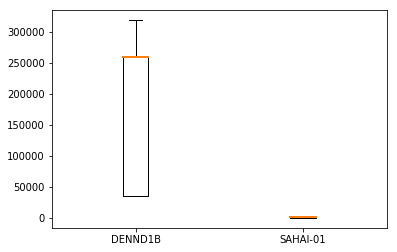

In [97]:
ax1 = plt.boxplot(length)
plt.setp(ax1['medians'], linewidth=2) 
plt.xticks([1,2], ["DENND1B", "SAHAI-01"])
plt.show()

#### Dotplot for better visualization of lengths of transcripts




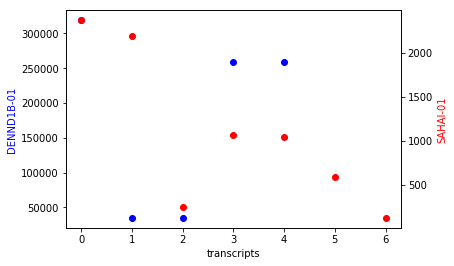

In [98]:
fig, ax1 = plt.subplots()

ax1.plot(len_den, 'ro', color='b')
ax1.set_xlabel('transcripts')
ax1.set_ylabel('DENND1B-01', color='b')
ax1.tick_params('DENND1B', colors='b')

ax2 = ax1.twinx()
ax2.plot(len_sahai, 'ro')
ax2.set_ylabel('SAHAI-01', color='r')
ax2.tick_params('SAHAI-01', colors='r')

plt.show()

*****


#### Append of column with max lenghts per transcript biotype





In [99]:
transcripts['length_max'] = transcripts.groupby(['transcript_biotype'])['length'].transform(max)
transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name,length,length_max
0,GL849905.1,ensembl,transcript,826885,827847,.,-,.,protein_coding,ENSSHAG00000011277,NaN,protein_coding,ENSSHAT00000013299,NaN,962,1107689
1,GL849905.1,ensembl,transcript,1831597,1936735,.,+,.,protein_coding,ENSSHAG00000015543,ATP11B,protein_coding,ENSSHAT00000018461,ATP11B-201,105138,1107689
2,GL849905.1,ensembl,transcript,1845704,1924465,.,+,.,protein_coding,ENSSHAG00000015543,ATP11B,protein_coding,ENSSHAT00000018462,ATP11B-202,78761,1107689
3,GL849905.1,ensembl,transcript,1961308,1979044,.,-,.,protein_coding,ENSSHAG00000015925,DCUN1D1,protein_coding,ENSSHAT00000018917,DCUN1D1-201,17736,1107689
4,GL849905.1,ensembl,transcript,2031211,2070986,.,-,.,protein_coding,ENSSHAG00000016104,MCCC1,protein_coding,ENSSHAT00000019128,MCCC1-201,39775,1107689


#### Extracting max lengths for individual biotypes




In [100]:
grouped = transcripts.groupby(['transcript_biotype']).length_max.unique()
for k,v in grouped.items():
    print(k)
    print(v)

Mt_rRNA
[1568]
Mt_tRNA
[73]
miRNA
[251]
misc_RNA
[372]
protein_coding
[1107689]
pseudogene
[599855]
rRNA
[135]
snRNA
[191]
snoRNA
[440]


#### Visualization in table




In [101]:
transcripts.groupby(['transcript_biotype']).length_max.value_counts().unstack().fillna("")

length_max,73,135,191,251,372,440,1568,599855,1107689
transcript_biotype,,,,,,,,,
Mt_rRNA,,,,,,,2,,
Mt_tRNA,22,,,,,,,,
miRNA,,,,486,,,,,
misc_RNA,,,,,113,,,,
protein_coding,,,,,,,,,22404
pseudogene,,,,,,,,178,
rRNA,,87,,,,,,,
snRNA,,,503,,,,,,
snoRNA,,,,,,277,,,


#### Name of the longest gene in protein coding genes



In [102]:
longest_transcript = [1107689]
for index, row in transcripts.iterrows():
   if row['length'] in longest_transcript:
      print(row.gene_name)

CDH13


**CDH13** should be [T-cadherin](https://en.wikipedia.org/wiki/T-cadherin)

also in other genomes these attaching/structural proteins have long genes




## The end, thank you...


[Uaaargh](https://youtu.be/iyvPjn2m240?t=2m37s)

![Sarcophilus harrisii](https://upload.wikimedia.org/wikipedia/commons/a/ac/Tasdevil_large.jpg)

